# Functions

### Get data from google search

In [5]:
from googlesearch.googlesearch import GoogleSearch
import re
import unicodedata
def googleSearch(query,num_results):
    response = GoogleSearch().search(query, num_results = num_results)
    doc_complete = []
    for result in response.results:
        if (result.getText() is not None and langdetect(result.getText())=='en'):
            doc_complete.append(re.sub("\s+"," " , result.getText()))
    return doc_complete

In [1]:
from langdetect import detect
def langdetect(txt):
    return detect(txt)
#langdetect("hello, my name is ")

### Cleaning and Preprocessing

In [74]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
from itertools import islice
tokenizer = RegexpTokenizer(r'\w+')
stop = set(stopwords.words('english'))

exclude = set(string.punctuation) 
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
lemma = WordNetLemmatizer()
def clean(doc):
    # clean and tokenize document string
    raw = doc.lower()
    tokens = tokenizer.tokenize(raw)
    
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stop]
    
    # remove punc_free from tokens
    punc_free = [ch for ch in stopped_tokens if ch not in exclude]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in punc_free]
    
    # lemm tokens
    normalized = [lemma.lemmatize(word) for word in punc_free]
    
    return normalized

def ngrams(tokens, n):
    # reconstruction de la chaine
    #raw=(' '.join(a) for a in nltk.ngrams(tokens, n))
    if n==1:
        grams=tokens
    else :
        raw="".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()
        raw=raw.split()
    
        grams = [' '.join(raw[i:i+n]) for i in xrange(len(raw)-n+1)]
    
    return grams


### Models functions

In [44]:
import gensim
from gensim import corpora, models, similarities
from six import iteritems
 

def gettfidf(doc_term_matrix):
    tfidf = models.TfidfModel(doc_term_matrix) # step 1 -- initialize a model
    corpus_tfidf = tfidf[doc_term_matrix]
    return corpus_tfidf

def Lsi(corpus_tfidf,dictionary,nbtopic,num_words):
    lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=nbtopic) # initialize an LSI transformation
    return lsi

def LDA(doc_term_matrix,dictionary,nbtopic,num_words):
    # Creating the object for LDA model using gensim library
    Lda = gensim.models.ldamodel.LdaModel
    # Running and Trainign LDA model on the document term matrix.
    ldamodel = models.LdaModel(doc_term_matrix, num_topics=nbtopic, id2word = dictionary, passes=50)
    #print(ldamodel)
    # words by topic
    return ldamodel

def print_topics(topics):
    #print "======= topics======================================================================================="
    for i,topic in enumerate(topics):
        print "topic %s : %s" %(i,topic[1])
        
def topics_toArray(topics):
    for i,topic in enumerate(topics):
        print "topic %s : %s" %(i,topic[1])

In [9]:
'''from googlesearch.googlesearch import GoogleSearch
import re
import sys
query = "data mining"
num_results = 10
response = GoogleSearch().search(query, num_results = num_results)

doc_complete = []
for result in response.results:
    print(result.get_url())
    try:
        if result.getText() is not None:
            doc=re.sub("\s+"," " , result.getText())
            print "============================================================="
            print doc[:100]
    except:
        print "Unexpected error:", sys.exc_info()[0]
        raise
'''

'from googlesearch.googlesearch import GoogleSearch\nimport re\nimport sys\nquery = "data mining"\nnum_results = 10\nresponse = GoogleSearch().search(query, num_results = num_results)\n\ndoc_complete = []\nfor result in response.results:\n    print(result.get_url())\n    try:\n        if result.getText() is not None:\n            doc=re.sub("\\s+"," " , result.getText())\n            print "============================================================="\n            print doc[:100]\n    except:\n        print "Unexpected error:", sys.exc_info()[0]\n        raise\n'

# Mains

### Search info from net

In [18]:
# search info from net
query = "data analytic"
num_results_search=10
doc_complete=googleSearch(query,num_results_search)
for i in range(2): #range(len(doc_complete)):
    u=doc_complete[i]
    print "============================== doc", i,"======================================================"
    print u[:500]

============================== doc 0 ======================================================
 Data analysis - Wikipedia Data analysis From Wikipedia, the free encyclopedia Jump to: navigation, search Part of a series on Statistics Data visualization Major dimensions Exploratory data analysis • Information design Interactive data visualization Descriptive statistics • Inferential statistics Statistical graphics • Plot Data analysis  • Infographic Data science Thought leaders John W. Tukey • Edward Tufte  • Hadley Wickham Information graphic types Line chart  • Bar chart Histogram • Scatt
============================== doc 1 ======================================================
 What is data analytics (DA)? - Definition from WhatIs.com SearchDataManagement Search the TechTarget Network Sign-up now. Start my free, unlimited access. Login Register Techtarget Network News Features Tips More Content Answers Buyer's Guides Essential Guides Opinions Photo Stories Podcasts Quizzes Tutorials Spo

### Cleaning + split in ngrams

In [13]:
# cleaning + split in ngrams
n_gram=3
doc_clean = [ngrams(clean(doc),n_gram) for doc in doc_complete]
for i in range(2):#range(len(doc_clean)):
    print "============================== doc", i,"======================================================"
    print doc_clean[i][:30]

============================== doc 0 ======================================================
[u'data analysis wikipedia', u'analysis wikipedia data', u'wikipedia data analysis', u'data analysis wikipedia', u'analysis wikipedia free', u'wikipedia free encyclopedia', u'free encyclopedia jump', u'encyclopedia jump navigation', u'jump navigation search', u'navigation search part', u'search part series', u'part series statistic', u'series statistic data', u'statistic data visualization', u'data visualization major', u'visualization major dimension', u'major dimension exploratory', u'dimension exploratory data', u'exploratory data analysis', u'data analysis information', u'analysis information design', u'information design interactive', u'design interactive data', u'interactive data visualization', u'data visualization descriptive', u'visualization descriptive statistic', u'descriptive statistic inferential', u'statistic inferential statistic', u'inferential statistic statistical', u'statisti

### Preparing Dictionary and Document-Term Matrix

In [19]:
#Preparing Dictionary and Document-Term Matrix
from six import iteritems
import gensim 
from gensim import corpora
#dir="/Users/kimtaing/Documents/github/WebMining/topics/python/"
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)
once_ids = [tokenid for tokenid, docfreq in iteritems(dictionary.dfs) if docfreq <= 1] # get words that appear only once
dictionary.filter_tokens(once_ids)  # remove words that appear only once
#dictionary.save(dir+'mydict.dict')  # store the dictionary, for future reference
#print dic to ckeck
for k, v in dictionary.iteritems():
    print "id %s => %s" % (k, v)

id 0 => several company augmenting
id 1 => artificial intelligence entered
id 2 => stedman share item
id 3 => address email address
id 4 => editor contact u
id 498 => privacy please create
id 6 => searchcontentmanagement artificial intelligence
id 7 => microsoft sql server
id 8 => function sql datetime
id 9 => opened look sap
id 10 => top benchmark cloud
id 11 => world enterprise collaboration
id 12 => oracle judged well
id 13 => converged storage hybrid
id 14 => essential guide opinion
id 15 => intelligence meet enterprise
id 16 => sql datepart getdate
id 591 => longer database outsider
id 17 => marketing effort cosabella
id 18 => outside united state
id 19 => data analytics help
id 20 => salesforce oracle inside
id 21 => form advanced analytics
id 22 => data analytics big
id 23 => data data analytics
id 405 => vision next gen
id 25 => b c e
id 26 => sap industry expert
id 27 => apple io ui
id 28 => submit password sent
id 29 => oracle sap sql
id 30 => sapphire 2017 sap
id 31 => lower

In [20]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
# store to disk, for later use
corpora.MmCorpus.serialize(dir+'/doc_term_matrix.mm', doc_term_matrix)
for i,doc in enumerate(doc_term_matrix):
    print "============ doc %s =======================" %(i)
    for d in doc:
        print "%s : %s"% (dictionary[d[0]], d[1])

============ doc 0 =======================
data data analytics : 1
b c e : 1
analytics business intelligence : 3
agree term use : 1
purpose business intelligence : 1
data analytics process : 1
data analysis eda : 1
data visualization technique : 1
data analysis data : 5
confirmatory data analysis : 1
data analysis cda : 1
data mining data : 1
use privacy policy : 1
r programming language : 1
john w tukey : 1
data visualization data : 2
c e f : 1
term use privacy : 1
application data analysis : 1
exploratory data analysis : 8
============ doc 1 =======================
several company augmenting : 1
artificial intelligence entered : 1
stedman share item : 1
address email address : 1
editor contact u : 1
cloud storage system : 1
searchcontentmanagement artificial intelligence : 1
microsoft sql server : 1
function sql datetime : 1
opened look sap : 1
top benchmark cloud : 1
world enterprise collaboration : 1
oracle judged well : 1
converged storage hybrid : 1
essential guide opinion : 1
in

In [21]:
# doc_term_matrix structure : doc(row) * M terms (column) => nb occurences of terms t in doc d
for i,doc in enumerate(doc_term_matrix):
    print "======== doc ",i,"========="
    print doc_term_matrix[i][:10]

======== doc  0 =========
[(23, 1), (25, 1), (34, 3), (60, 1), (77, 1), (180, 1), (274, 1), (307, 1), (315, 5), (328, 1)]
======== doc  1 =========
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
======== doc  2 =========
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
======== doc  3 =========
[(19, 1), (22, 2), (34, 1), (56, 1), (86, 1), (89, 3), (144, 1), (229, 1), (256, 1), (265, 1)]
======== doc  4 =========
[(56, 2), (284, 3), (417, 2)]
======== doc  5 =========
[(25, 1), (37, 1), (44, 1), (47, 1), (72, 1), (77, 1), (81, 1), (120, 1), (121, 1), (143, 1)]
======== doc  6 =========
[(19, 1), (22, 1), (23, 2), (38, 1), (86, 1), (207, 1), (209, 1), (228, 1), (271, 2), (357, 3)]
======== doc  7 =========
[(170, 1), (236, 1), (302, 1), (365, 1), (492, 1), (549, 1)]


### Parm model Lsi and LDA

In [25]:
#parameter for model Lsi and LDA
nbtopic=3
num_words=5

### Running Lsi Model

## Lsi Model

In [26]:
# print tfidf by doc
corpus_tfidf=gettfidf(doc_term_matrix)
#for i,doc in enumerate(corpus_tfidf): # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
#    print "======== doc ",i,"========="
#    print(doc)
    
# call model lsi    
lsi=Lsi(corpus_tfidf,dictionary,nbtopic,num_words)
topics=lsi.print_topics(nbtopic,num_words=num_words)
print_topics(topics)
print "\n======= topic rate by doc ======================================================================================="
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
for i,doc in enumerate(corpus_lsi):
    print "===> doc ",i," :"
    print(doc)

======= topics=======================================================================================
topic 0 : 0.423*"big data analytics" + 0.257*"add comment cancel" + 0.121*"analytics big data" + 0.112*"data analytics definition" + 0.111*"data big data"
topic 1 : 0.365*"big data analytics" + 0.239*"natural language processing" + 0.228*"data science sa" + 0.226*"analytics big data" + 0.205*"data big data"
topic 2 : 0.454*"natural language processing" + 0.313*"machine learning natural" + 0.313*"learning natural language" + -0.291*"social network analysis" + -0.222*"data application data"

======= topic rate by doc =======================================================================================
===> doc  0  :
[(0, 0.16218616647879347), (1, -0.029961376265835955), (2, -0.17998119183380895)]
===> doc  1  :
[(0, 0.77787702632385813), (1, -0.525493957974556), (2, 0.057111198725632466)]
===> doc  2  :
[(0, 0.88974679625904896), (1, -0.28689665971321604), (2, 0.091503077551700493)]
==

# Running LDA Model

In [27]:
ldamodel=LDA(doc_term_matrix,dictionary,nbtopic,num_words)
topics=ldamodel.print_topics(num_topics=nbtopic, num_words=num_words)
print_topics(topics)
print "\n======= topic rate by doc ======================================================================================="
for i,doc in enumerate(doc_term_matrix):
    print "===> doc ",i," :"
    print(ldamodel.get_document_topics(doc))

======= topics=======================================================================================
topic 0 : 0.026*"big data analytics" + 0.013*"add comment cancel" + 0.005*"data analytics process" + 0.004*"e mail address" + 0.004*"see complete definition"
topic 1 : 0.075*"big data analytics" + 0.025*"exploratory data analysis" + 0.016*"analytics big data" + 0.016*"data analysis data" + 0.013*"analytics business intelligence"
topic 2 : 0.010*"data analytics definition" + 0.006*"social network analysis" + 0.006*"data analytics data" + 0.006*"analytics data analytics" + 0.006*"definition data analytics"

======= topic rate by doc =======================================================================================
===> doc  0  :
[(1, 0.98035678561917372)]
===> doc  1  :
[(0, 0.99881831919940833)]
===> doc  2  :
[(0, 0.99893627073446256)]
===> doc  3  :
[(1, 0.98667525683466095)]
===> doc  4  :
[(0, 0.041683732897911628), (1, 0.91654242872806857), (2, 0.04177383837401985)]
===> doc  

In [84]:
# search info from net
queries = ["data analytic","data visualization","network analysis"]
for i, query in enumerate(queries):
    print "==============================", query ,"=============================="
  
    num_results_search=10
    doc_complete=googleSearch(query,num_results_search)
    '''for i in range(2): #range(len(doc_complete)):
        u=doc_complete[i]
        print "============================== doc", i,"======================================================"
        print u[:500]
    '''    
    # cleaning + split in ngrams
    n_gram=3
    doc_clean = [ngrams(clean(doc),n_gram) for doc in doc_complete]
    '''for i in range(2):#range(len(doc_clean)):
        print "============================== doc", i,"======================================================"
        print doc_clean[i][:30]

    '''    

    # Creating the term dictionary of our courpus, where every unique term is assigned an index. 
    dictionary = corpora.Dictionary(doc_clean)
    once_ids = [tokenid for tokenid, docfreq in iteritems(dictionary.dfs) if docfreq <= 1] # get words that appear only once
    query_ids=[tokenid for tokenid, term in dictionary.iteritems() if term == query]
    dictionary.filter_tokens(once_ids)  # remove words that appear only once
    dictionary.filter_tokens(query_ids)  # remove words that equal to query
    #print dic to ckeck
    '''for k, v in list(islice(dictionary.iteritems() , 5)):
        print "id %s => %s" % (k, v)
    '''  

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    '''for i,doc in enumerate(doc_term_matrix):
        print "============ doc %s =======================" %(i)
        for d in doc:
            print "%s : %s"% (dictionary[d[0]], d[1])
    '''        
    #parameter for model 
    nbtopic=5
    num_words=3

    #run model
    
    if len([x for x in doc_term_matrix if x != []]) >0:
        ldamodel=LDA(doc_term_matrix,dictionary,nbtopic,num_words)
        topics=ldamodel.print_topics(num_topics=nbtopic, num_words=num_words)
        print_topics(topics)
        print "\n*** topic rate by doc ***"
        for i,doc in enumerate(doc_term_matrix):
            print "===> doc ",i," :"
            print(ldamodel.get_document_topics(doc))
 

============================== data analytic ==============================
topic 0 : 0.042*"big data analytics" + 0.013*"add comment cancel" + 0.005*"data analytics process"
topic 1 : 0.009*"data application data" + 0.009*"inc right reserved" + 0.009*"analyzing large datasets"
topic 2 : 0.049*"exploratory data analysis" + 0.031*"data analysis data" + 0.025*"natural language processing"
topic 3 : 0.014*"data analytics definition" + 0.008*"analytics data analytics" + 0.008*"data big data"
topic 4 : 0.002*"data application data" + 0.002*"application data analysis" + 0.002*"analytics data analytics"

*** topic rate by doc ***
===> doc  0  :
[(2, 0.97709894862172708)]
===> doc  1  :
[(0, 0.99863375729792603)]
===> doc  2  :
[(0, 0.99879881480316079)]
===> doc  3  :
[(0, 0.8924079012636601), (2, 0.096013190535671117)]
===> doc  4  :
[(0, 0.025000132132890627), (1, 0.025001425301392054), (2, 0.89999577164311451), (3, 0.025001174738930921), (4, 0.025001496183671919)]
===> doc  5  :
[(0, 0.972

Populating the interactive namespace from numpy and matplotlib
None
None
None
None
None
None
None
None
None
None


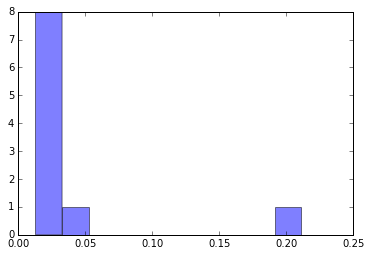

In [165]:
%pylab inline --no-import-all
import numpy as np
from matplotlib import pyplot as plt
tab=ldamodel.show_topic(topicid=0, topn=10)
data=[]
for i,item in enumerate(tab):
    print data.append(item[1])
# fixed bin size
bins = np.arange(0, 1, .05) # fixed bin size
plt.hist(data, alpha=0.5)
plt.show()

